Plan for this cycle:
    - look at more examples of reading from files and dealing with data
    - Start thinking more about data structures
    - make our first use of a data plotting library
 
A recap - last cycle, we saw and practiced:
- reading data from a file
- dealing with errors both *defensively* and using *exceptions*
- writing functions for working with a particular data structure

Today, we'll do more of this with messier and more complicated data, and include some visualisation.
Part of the goal of looking at the visualisation is to get more experience using a Python **library**


**Our data**

We want to write a system to deal with commuter information (this example uses fictional data). On each line of our file there will be three pieces of information, separated by commas:
`id_number,origin_name,destination_name`

Where 
- `id_number` is the identifier for an individual person, and 
- `origin_name` is where they started from in a day's commute, and
- `destination_name` is where they went. 

Let's call a single line a 'journey'

Here is an example of a lines in a file that we might see:

`90999,Milngavie,Glasgow
892341,Glasgow,Carlisle
892341,Glasgow,Edinburgh`

What would be a good data structure to store this information?


We could talk about a couple different options:
- a dictionary with the `id_number` as a key, and a list of tuples as values
- a list of 3-tuples
- anything else anyone can think of?

*Key questions to think about*: 
- Why is a dictionary with an entry per line unsuitable?
- Should the id numbers be strings or numbers?

Let's look at an example of the first option:

In [ ]:
myData = {'90999': [('Milngavie','Glasgow')], '892341': [('Glasgow', 'Carlisle'), ('Glasgow', 'Edinburgh')]}

In [ ]:
Or an example of the second:

In [ ]:
myData = [('90999','Milngavie','Glasgow'), ('892341','Glasgow','Carlisle'), ('892341','Glasgow','Edinburgh')]

I'm going to proceed with that first option: a dictionary with the `id_number` as a key. and a list of tuples as values

Now that we've picked our data structure, let's work on some functions to process it.

What might we want to do?
- read in data
- find the list of places a single person commutes to
- count the number of journeys between different places
- etc


This idea of a data structure and a suite of functions built to operate on it is a fundamental notion that you'll see over and over in computing science - it's the idea that leads to *objects*

We will write a couple functions, and then look at plotting (split over multiple videos).

First, we will write a function to count the total number of journeys recorded for each person, and a function to read in values.  

In [7]:
myData = {'90999': [('Milngavie','Glasgow')], '892341': [('Glasgow', 'Carlisle'), ('Glasgow', 'Edinburgh')]}

def countJourneysByPerson(dataStruct):
    personToNumber = {}
    for person in dataStruct:
        listOfTrips = dataStruct[person]
        personToNumber[person] = len(listOfTrips)
    return personToNumber
        

def readJourneysFromFile(filename):
    dataStruct = {}
    try:
        for line in open(filename, 'r'):
            split = line.strip().split(",")
            if len(split)< 3:
                print("There is a problem with line "+ line.strip())
            #What else might I check for defensively?
            else:
                if split[0] not in dataStruct:
                    dataStruct[split[0]] = []
                theTuple = (split[1], split[2])
                dataStruct[split[0]].append(theTuple)
    
        return dataStruct
    except Exception as e:
        print('Failure while to reading from ' + filename)
        print('Due to exception ' + str(e))
        return dataStruct
        
myJourneys = readJourneysFromFile('sampleJourneys.csv') 
for idNum in myJourneys:
    print (idNum + ": " + str(myJourneys[idNum]))


counts = countJourneysByPerson(myJourneys)
for count in counts:
    print (count + ": " + str(counts[count]))


﻿102: [('Glasgow', 'Edinburgh')]
103: [('Glasgow', 'Edinburgh')]
104: [('Glasgow', 'Edinburgh')]
105: [('Glasgow', 'Edinburgh')]
106: [('Glasgow', 'Edinburgh')]
107: [('Glasgow', 'Edinburgh')]
108: [('Glasgow', 'Edinburgh')]
109: [('Glasgow', 'Edinburgh')]
110: [('Glasgow', 'Edinburgh')]
111: [('Glasgow', 'Edinburgh')]
112: [('Glasgow', 'Edinburgh')]
113: [('Glasgow', 'Edinburgh')]
114: [('Glasgow', 'Edinburgh')]
115: [('Glasgow', 'Edinburgh')]
116: [('Glasgow', 'Edinburgh')]
117: [('Glasgow', 'Edinburgh')]
118: [('Glasgow', 'Edinburgh')]
119: [('Glasgow', 'Edinburgh')]
120: [('Glasgow', 'Edinburgh')]
121: [('Glasgow', 'Edinburgh')]
122: [('Glasgow', 'Edinburgh')]
123: [('Glasgow', 'Edinburgh')]
124: [('Glasgow', 'Edinburgh'), ('Glasgow', 'Bearsden')]
125: [('Glasgow', 'Edinburgh'), ('Glasgow', 'Bearsden')]
126: [('Glasgow', 'Edinburgh'), ('Glasgow', 'Bearsden')]
127: [('Glasgow', 'Edinburgh'), ('Glasgow', 'Bearsden')]
128: [('Glasgow', 'Edinburgh'), ('Glasgow', 'Bearsden')]
129: [('Gl

Let's think about another couple functions we could write:
1. a function that counts the number of people who have done each unique journey
2. a function that counts the number of journeys that end in each destination

In [4]:
# we will assume each person does each journey at most once
def countPeoplePerJourney(dataStruct):
    countDict = {}
    for person in dataStruct:
        journeys = dataStruct[person]
        for journey in journeys:
            if journey not in countDict:
                countDict[journey] = 0
            countDict[journey] = countDict[journey] +1
    return countDict


def countJourneysPerDestination(dataStruct):
    countDict = {}
    for person in dataStruct:
        journeys = dataStruct[person]
        for journey in journeys:
            (origin, destination) = journey
            if destination not in countDict:
                countDict[destination] = 0
            countDict[destination] = countDict[destination] +1
    return countDict



# Important question: how might we add error-checking or exception-catching to our functions above?

myData = {'90999': [('Milngavie','Glasgow')], '892341': [('Glasgow', 'Carlisle'), ('Glasgow', 'Edinburgh')], '909679': [('Milngavie','Glasgow')]}

print(countPeoplePerJourney(myData))
print(countJourneysPerDestination(myData))



{('Milngavie', 'Glasgow'): 2, ('Glasgow', 'Carlisle'): 1, ('Glasgow', 'Edinburgh'): 1}
{'Glasgow': 2, 'Carlisle': 1, 'Edinburgh': 1}


**Important extra task:** think about errors and exceptions - what else could you add?
    
But for the moment, let's look at plotting.  We are going to use a library called matplotlib for plotting.

https://matplotlib.org/

A big part of the reason for this: I want you to practice using an existing library, and understanding documentation.

Let's look at a basic example of a scatterplot in matplotlib:

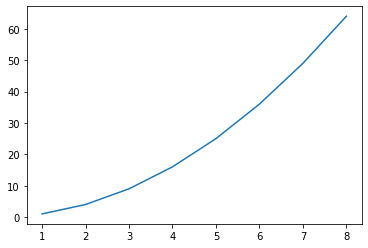

In [10]:
import matplotlib.pyplot as plt

xVals = [1, 2, 3, 4, 5, 6, 7, 8]
yVals = [1, 4, 9, 16, 25, 36, 49, 64]

plt.plot(xVals, yVals)
plt.show()

There are loads of different plotting styles possible using matplotlib!  Feel free to have look and try things out.

We'll have a quick look at **histograms** and **scatterplots**

Let's use the histogram function to plot a histogram of the number of journeys for each person.  We already have a function to get the count of number of different journeys for each person!

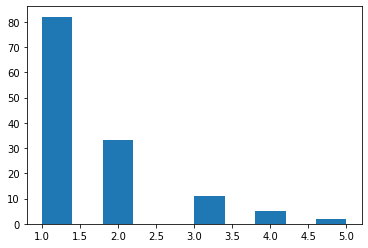

In [26]:
# this gets us just the values from the dictionary -
#here, it will be just the counts of journeys, not the ids
justCounts = counts.values()

plt.hist(justCounts)
plt.show()

Now let's look at a scatterplot. We can find the docs for `matplotlib`'s `scatter` here:  https://matplotlib.org/api/_as_gen/matplotlib.pyplot.scatter.html

(Note the many pretty examples near the bottom of the docs page)

First, let's do a generic example with our `xVals` and `yVals` from before:

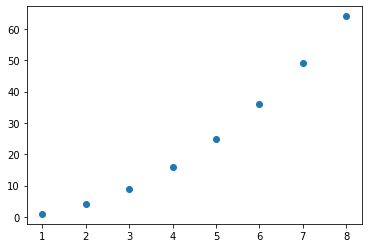

In [11]:
plt.scatter(xVals, yVals)
plt.show()

It's good practice to have x and y axis labels, so we should usually add those!

We may also want to change the colour or the shape of our markers.  There are many, many possibilities of how to make our plots more informative and beautiful.  I encourage you to have a look around the matplotlib documentation - you'll have a good change to use some of your plotting skills in your assessed assignment.  

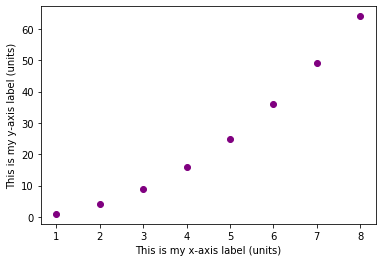

In [12]:
plt.scatter(xVals, yVals, color = 'purple')
plt.xlabel('This is my x-axis label (units)')
plt.ylabel('This is my y-axis label (units)')
plt.show()